# Sudoku Neural Network Training

Simple fully connected ReLU network for Sudoku solving - testbed for symbolic layer integration

In [1]:
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nn import SudokuNet, SudokuDataset, SudokuTrainer, load_kaggle_data

## 1. Load and Prepare Data

Download the dataset from: https://www.kaggle.com/datasets/bryanpark/sudoku

Place `sudoku.csv` in the same directory as this notebook.

In [2]:
# Load data (use fewer samples for faster experimentation)
puzzles, solutions = load_kaggle_data('sudoku.csv', max_samples=50000)

print(f"Loaded {len(puzzles)} puzzles")
print(f"Example puzzle:  {puzzles[0]}")
print(f"Example solution: {solutions[0]}")

Loaded 50000 puzzles
Example puzzle:  004300209005009001070060043006002087190007400050083000600000105003508690042910300
Example solution: 864371259325849761971265843436192587198657432257483916689734125713528694542916378


In [3]:
# Split into train/validation
train_puzzles, val_puzzles, train_solutions, val_solutions = train_test_split(
    puzzles, solutions, test_size=0.2, random_state=834
)

print(f"Training samples: {len(train_puzzles)}")
print(f"Validation samples: {len(val_puzzles)}")

Training samples: 40000
Validation samples: 10000


In [4]:
# Create datasets and dataloaders
train_dataset = SudokuDataset(train_puzzles, train_solutions)
val_dataset = SudokuDataset(val_puzzles, val_solutions)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

## 2. Create and Train Model

In [5]:
# Create model - experiment with different architectures
model = SudokuNet(hidden_sizes=[256, 256, 256])

# Create trainer
trainer = SudokuTrainer(model)
trainer.setup_optimizer(lr=1e-3, weight_decay=1e-5)

print(f"Model has {sum(p.numel() for p in model.parameters()):,} parameters")

Model has 339,929 parameters


In [6]:
# Train the model
trainer.train(train_loader, val_loader, epochs=50)

Training on cuda
Model parameters: 339,929


Epoch 1/50
  Train Loss: 2.1757
  Val Loss: 2.1566
  Cell Accuracy: 0.1485 (14.85%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 2/50
  Train Loss: 2.1451
  Val Loss: 2.1431
  Cell Accuracy: 0.1535 (15.35%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 3/50
  Train Loss: 2.1304
  Val Loss: 2.1341
  Cell Accuracy: 0.1567 (15.67%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 4/50
  Train Loss: 2.1168
  Val Loss: 2.1227
  Cell Accuracy: 0.1586 (15.86%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 5/50
  Train Loss: 2.1024
  Val Loss: 2.1114
  Cell Accuracy: 0.1616 (16.16%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 6/50
  Train Loss: 2.0869
  Val Loss: 2.0979
  Cell Accuracy: 0.1660 (16.60%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 7/50
  Train Loss: 2.0689
  Val Loss: 2.0800
  Cell Accuracy: 0.1716 (17.16%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 8/50
  Train Loss: 2.0475
  Val Loss: 2.0576
  Cell Accuracy: 0.1799 (17.99%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 9/50
  Train Loss: 2.0239
  Val Loss: 2.0334
  Cell Accuracy: 0.1892 (18.92%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 10/50
  Train Loss: 1.9987
  Val Loss: 2.0088
  Cell Accuracy: 0.1991 (19.91%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 11/50
  Train Loss: 1.9730
  Val Loss: 1.9815
  Cell Accuracy: 0.2087 (20.87%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 12/50
  Train Loss: 1.9467
  Val Loss: 1.9545
  Cell Accuracy: 0.2198 (21.98%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 13/50
  Train Loss: 1.9199
  Val Loss: 1.9248
  Cell Accuracy: 0.2309 (23.09%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 14/50
  Train Loss: 1.8924
  Val Loss: 1.9011
  Cell Accuracy: 0.2419 (24.19%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 15/50
  Train Loss: 1.8664
  Val Loss: 1.8764
  Cell Accuracy: 0.2515 (25.15%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 16/50
  Train Loss: 1.8435
  Val Loss: 1.8533
  Cell Accuracy: 0.2627 (26.27%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 17/50
  Train Loss: 1.8248
  Val Loss: 1.8346
  Cell Accuracy: 0.2699 (26.99%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 18/50
  Train Loss: 1.8088
  Val Loss: 1.8229
  Cell Accuracy: 0.2750 (27.50%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 19/50
  Train Loss: 1.7940
  Val Loss: 1.8187
  Cell Accuracy: 0.2753 (27.53%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 20/50
  Train Loss: 1.7836
  Val Loss: 1.8028
  Cell Accuracy: 0.2848 (28.48%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 21/50
  Train Loss: 1.7732
  Val Loss: 1.7918
  Cell Accuracy: 0.2880 (28.80%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 22/50
  Train Loss: 1.7653
  Val Loss: 1.7831
  Cell Accuracy: 0.2949 (29.49%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 23/50
  Train Loss: 1.7568
  Val Loss: 1.7780
  Cell Accuracy: 0.2946 (29.46%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 24/50
  Train Loss: 1.7492
  Val Loss: 1.7738
  Cell Accuracy: 0.2982 (29.82%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 25/50
  Train Loss: 1.7428
  Val Loss: 1.7652
  Cell Accuracy: 0.3010 (30.10%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 26/50
  Train Loss: 1.7368
  Val Loss: 1.7581
  Cell Accuracy: 0.3050 (30.50%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 27/50
  Train Loss: 1.7303
  Val Loss: 1.7514
  Cell Accuracy: 0.3075 (30.75%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 28/50
  Train Loss: 1.7248
  Val Loss: 1.7542
  Cell Accuracy: 0.3089 (30.89%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 29/50
  Train Loss: 1.7183
  Val Loss: 1.7410
  Cell Accuracy: 0.3128 (31.28%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 30/50
  Train Loss: 1.7132
  Val Loss: 1.7414
  Cell Accuracy: 0.3138 (31.38%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 31/50
  Train Loss: 1.7070
  Val Loss: 1.7318
  Cell Accuracy: 0.3181 (31.81%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 32/50
  Train Loss: 1.7022
  Val Loss: 1.7262
  Cell Accuracy: 0.3226 (32.26%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 33/50
  Train Loss: 1.6963
  Val Loss: 1.7177
  Cell Accuracy: 0.3237 (32.37%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 34/50
  Train Loss: 1.6908
  Val Loss: 1.7195
  Cell Accuracy: 0.3249 (32.49%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 35/50
  Train Loss: 1.6859
  Val Loss: 1.7175
  Cell Accuracy: 0.3259 (32.59%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 36/50
  Train Loss: 1.6803
  Val Loss: 1.7092
  Cell Accuracy: 0.3290 (32.90%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 37/50
  Train Loss: 1.6753
  Val Loss: 1.6995
  Cell Accuracy: 0.3337 (33.37%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 38/50
  Train Loss: 1.6706
  Val Loss: 1.6965
  Cell Accuracy: 0.3343 (33.43%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 39/50
  Train Loss: 1.6659
  Val Loss: 1.6926
  Cell Accuracy: 0.3361 (33.61%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 40/50
  Train Loss: 1.6611
  Val Loss: 1.6846
  Cell Accuracy: 0.3402 (34.02%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 41/50
  Train Loss: 1.6565
  Val Loss: 1.6870
  Cell Accuracy: 0.3388 (33.88%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 42/50
  Train Loss: 1.6528
  Val Loss: 1.6820
  Cell Accuracy: 0.3411 (34.11%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 43/50
  Train Loss: 1.6484
  Val Loss: 1.6776
  Cell Accuracy: 0.3461 (34.61%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 44/50
  Train Loss: 1.6436
  Val Loss: 1.6730
  Cell Accuracy: 0.3460 (34.60%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 45/50
  Train Loss: 1.6397
  Val Loss: 1.6671
  Cell Accuracy: 0.3490 (34.90%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 46/50
  Train Loss: 1.6358
  Val Loss: 1.6705
  Cell Accuracy: 0.3474 (34.74%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 47/50
  Train Loss: 1.6321
  Val Loss: 1.6581
  Cell Accuracy: 0.3517 (35.17%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 48/50
  Train Loss: 1.6289
  Val Loss: 1.6519
  Cell Accuracy: 0.3544 (35.44%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 49/50
  Train Loss: 1.6257
  Val Loss: 1.6534
  Cell Accuracy: 0.3556 (35.56%)
  Puzzle Accuracy: 0.0000 (0.00%)



Epoch 50/50
  Train Loss: 1.6219
  Val Loss: 1.6501
  Cell Accuracy: 0.3561 (35.61%)
  Puzzle Accuracy: 0.0000 (0.00%)



## 3. Visualize Training Progress

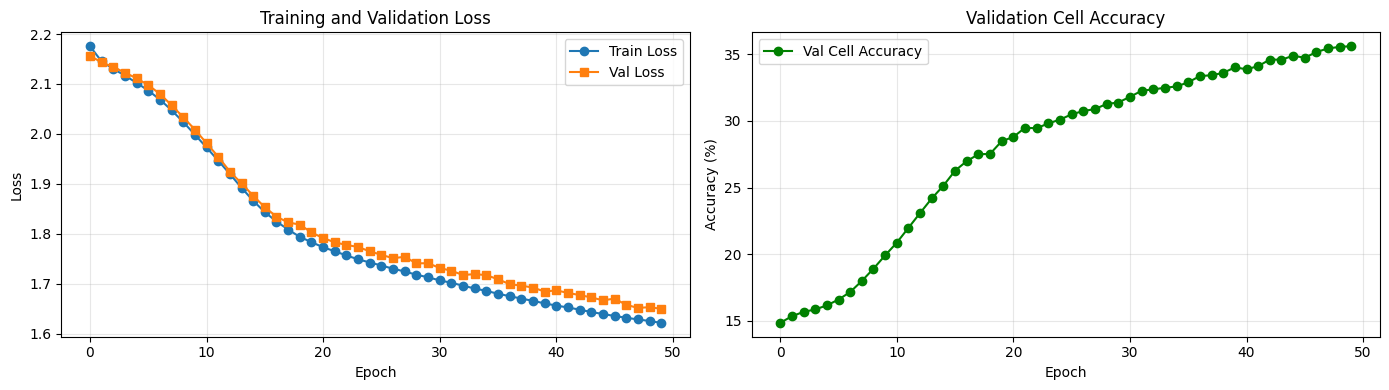

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot losses
ax1.plot(trainer.train_losses, label='Train Loss', marker='o')
ax1.plot(trainer.val_losses, label='Val Loss', marker='s')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot accuracy
ax2.plot([acc * 100 for acc in trainer.val_accuracies], label='Val Cell Accuracy', marker='o', color='green')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Validation Cell Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Test Predictions

In [8]:
def visualize_sudoku(puzzle_str, title="Sudoku"):
    """Visualize a sudoku puzzle."""
    puzzle = [int(c) for c in puzzle_str]
    fig, ax = plt.subplots(figsize=(6, 6))
    
    for i in range(9):
        for j in range(9):
            val = puzzle[i * 9 + j]
            if val != 0:
                ax.text(j + 0.5, 8.5 - i, str(val), 
                       ha='center', va='center', fontsize=16,
                       color='black' if val != 0 else 'gray')
    
    # Draw grid
    for i in range(10):
        lw = 2 if i % 3 == 0 else 0.5
        ax.axhline(i, color='black', linewidth=lw)
        ax.axvline(i, color='black', linewidth=lw)
    
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    return fig

Puzzle:


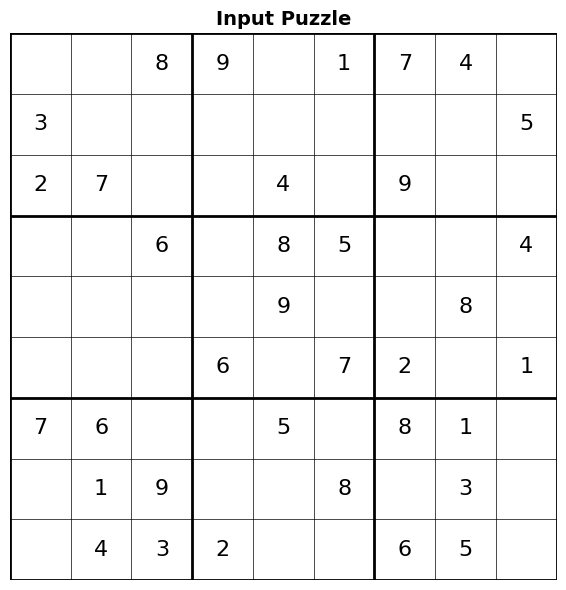


Prediction:


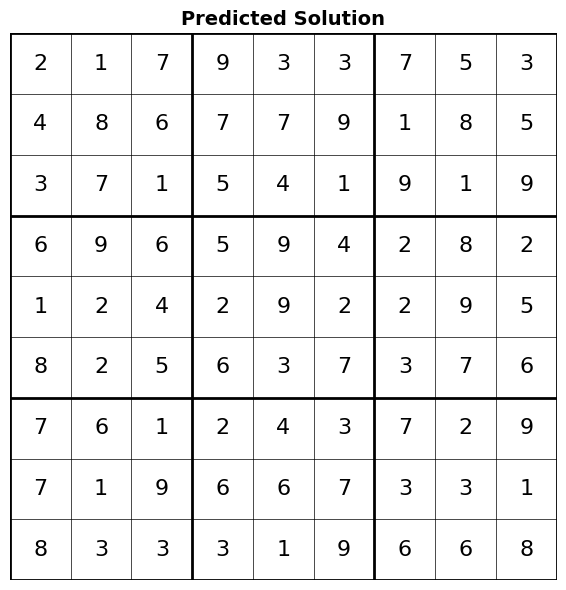


Ground Truth:


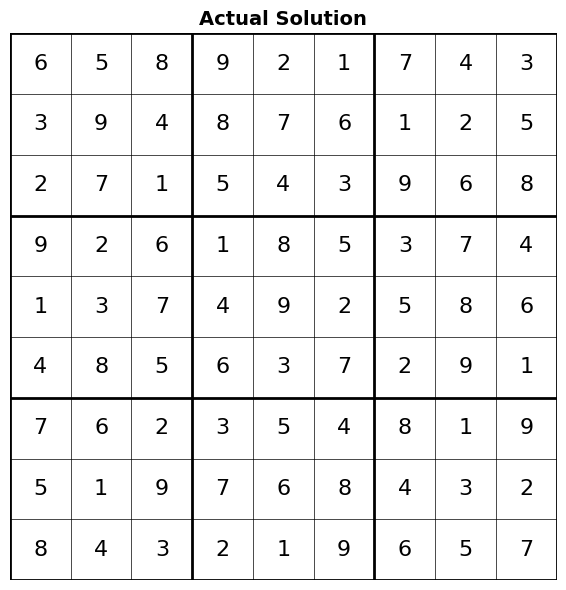


Cells correct: 31/81 (38.3%)


In [9]:
# Test on a validation example
idx = 0
test_puzzle = val_puzzles[idx]
test_solution = val_solutions[idx]
prediction = trainer.predict(test_puzzle)

print("Puzzle:")
visualize_sudoku(test_puzzle, "Input Puzzle")
plt.show()

print("\nPrediction:")
visualize_sudoku(prediction, "Predicted Solution")
plt.show()

print("\nGround Truth:")
visualize_sudoku(test_solution, "Actual Solution")
plt.show()

# Calculate accuracy
correct = sum(p == s for p, s in zip(prediction, test_solution))
print(f"\nCells correct: {correct}/81 ({correct/81*100:.1f}%)")

## 5. Save/Load Model

In [10]:
# Save the trained model
trainer.save('sudoku_model.pth')

Model saved to sudoku_model.pth


In [11]:
# Load a saved model
# new_model = SudokuNet(hidden_sizes=[512, 512, 512])
# new_trainer = SudokuTrainer(new_model)
# new_trainer.load('sudoku_model.pth')

## 6. Analyze Error Patterns

This is useful for understanding where to add symbolic layers

In [12]:
def check_constraints(solution_str):
    """Check if a solution satisfies Sudoku constraints."""
    solution = [int(c) for c in solution_str]
    board = [[solution[i*9 + j] for j in range(9)] for i in range(9)]
    
    violations = {'row': 0, 'col': 0, 'box': 0}
    
    # Check rows
    for row in board:
        if len(set(row)) != 9:
            violations['row'] += 1
    
    # Check columns
    for j in range(9):
        col = [board[i][j] for i in range(9)]
        if len(set(col)) != 9:
            violations['col'] += 1
    
    # Check 3x3 boxes
    for bi in range(3):
        for bj in range(3):
            box = [board[bi*3 + i][bj*3 + j] for i in range(3) for j in range(3)]
            if len(set(box)) != 9:
                violations['box'] += 1
    
    return violations

# Check constraint violations on predictions
total_violations = {'row': 0, 'col': 0, 'box': 0}
samples_to_check = min(100, len(val_puzzles))

for i in range(samples_to_check):
    pred = trainer.predict(val_puzzles[i])
    viols = check_constraints(pred)
    for k in viols:
        total_violations[k] += viols[k]

print(f"Constraint violations in {samples_to_check} predictions:")
print(f"  Row violations: {total_violations['row']}")
print(f"  Column violations: {total_violations['col']}")
print(f"  Box violations: {total_violations['box']}")

Constraint violations in 100 predictions:
  Row violations: 898
  Column violations: 897
  Box violations: 898
